# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# PROBLEM STATEMENT

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Our job is to develop a regression model to find out variables which are significant in predicting the demand for shared bikes.
This will help the management to strategise their buisness plan and to meet their user's Bike Sharing Demand.

Let us start our excercise by importing important libraries that will be required while analysing our data.

In [610]:
# Impoting Important Libraries

import pandas as pd                     # to bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
%matplotlib inline 
import seaborn as sns                   # for statistical graphics
import datetime                         #supplies classes to work with date and time

from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing Data Set and Basic Data Exploration

In [611]:
# Importing the Bike Sharing Dataset

df = pd.read_csv(r'C:\Users\rankiz\Desktop\Alma Better\Capstone Project\ML-Supervised Learning Regression\Bike Sharing Demand Prediction\SeoulBikeData.csv')

In [612]:
# Displaying size of the data

df.shape

(8760, 14)

In [613]:
# Displaying top 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [614]:
# Displaying Bottom 5 Rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [615]:
# Taking a look at variable's name

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [616]:
# Displaying Data Set Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [617]:
# Checking description for numerical variables

df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


 *We have done an overview of our data.*
* We have got 14 features and  8760 rows.
* 'Rented Bike Count' is our dependent variable. 
* There are no null values in any of the column. Phewww !!
* Out of 14 Variables - 4 Variables are of Object Dtype , while 10 are of numerical Dtype.


# Data Wrangling

### 1. Checking for Duplicates

In [618]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
print(check_dupl)

False


Result : There are no duplicate rows. 

### 2. Checking For Null Values

In [619]:
# Displaying Null Values

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Result : No Null Values Found !!

 
### 3. Feature Engineering 

#### a) Date Column

In [620]:
# Let's check how many years data is taken

years_in_data = pd.to_datetime(df['Date']).dt.year.unique()
months_in_data = pd.to_datetime(df['Date']).dt.month.nunique()

print(f'{months_in_data} months data for year {years_in_data}  is captured in the given dataset.')


12 months data for year [2017 2018]  is captured in the given dataset.


Date variable contains information of - day,month and year for a given data. Since, data is of only two years, we can ignore the 'Year' Part of the information. 'Month'  and 'Day' information we can use to look for a trend of bike booking. Let us implement this.

In [622]:
# Extracting Weekend and Month from Date Column information

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day'] = df['Date'].dt.day_name()
df['weekend']= df['day'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


Now that we have extracted the relevant information from "Date" column, let us drop 'Date' Column. 

In [623]:
# Dropping 'Date' column

df = df.drop(['Date'],axis=1)

#### b) Functioning Day
The "Functioning day" feature is unwanted as it is obvious that in a non-functioning hours/day the "Rented Bike Count" will be zero and hence this information doesn't add any value .So, let us drop this column as well.

In [625]:
# Dropping 'Functioning Day' column

df = df.drop(['Functioning Day'], axis=1)

In [626]:
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,month,day,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0


# EXPLORATORY DATA ANALYSIS

We have got two types of independent variables in our data - Continous type and Catagorical Type. Let us make two seperate dataframe for Catagorical Variables and Continous Variables. This will help us to analyse both types differently.

In [627]:
# Seperating Continous and catagorical variable for future usage.

cat_df= df[['Hour','Seasons','Holiday','month','day','weekend']] # Catagorical Variables

num_df = df[['Rented Bike Count', 'Hour','Temperature(�C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
             'Dew point temperature(�C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']] #Continous Variables

#### 1. Checking Correlation of numerical Variables

In [ ]:
# Displaying Pairplot:

sns.pairplot(num_df, diag_kind='kde')
plt.show()

In [ ]:
# Plotting Coorelation HeatMap

plt.subplots(figsize=(12, 9))
sns.heatmap(num_df.corr(), annot = True)

* To know how much each variable will contribute to the result of model training, we shall remove every hint of multicollinearity. Since, variables 'Temperature' and  'Dew Point Temperature' are positively related, hence we shall keep only one of them.

In [628]:
# Removing Multicollinearity by dropping 'Dew Point Temperature' column

df= df.drop(['Dew point temperature(�C)'],axis =1)

# Updating num_df

num_df =num_df.drop(['Dew point temperature(�C)'],axis =1)

#### 2) Effect of Hour on Bike Sharing Demand

[Text(0.5, 1.0, 'Rented Bike Count During different Seasons')]

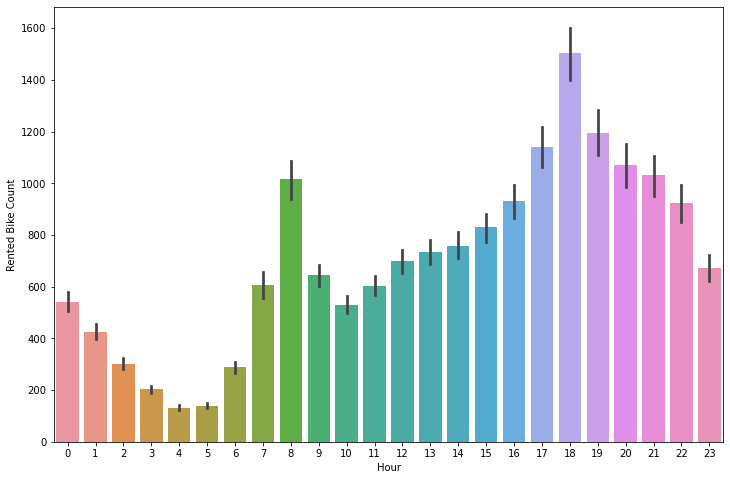

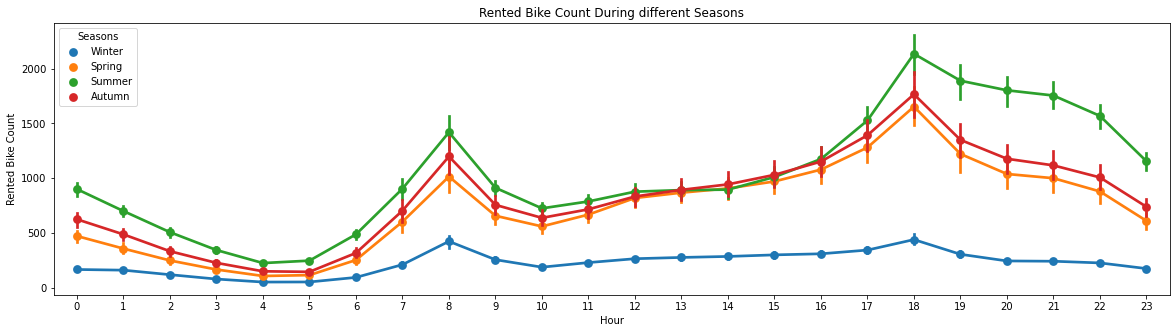

In [629]:
# Displaying Hourly basis Bike Demand

plt.figure(figsize = (12,8))
sns.barplot(x='Hour', y='Rented Bike Count', data = df)

# Displaying Hourly basis Bike Demand in different seasons

fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Rented Bike Count During different Seasons')

Insight : 
* The Bike sharing demand increases to maximum between 5pm to 7PM. The demand usually peaks at around 6pm. 
* Morning between 3am to 4am, Bike Demand is minimum.
* The Hourly demand pattern for all seasons is nearly same.

#### 3. Seasons vs Rented Bike Count

  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

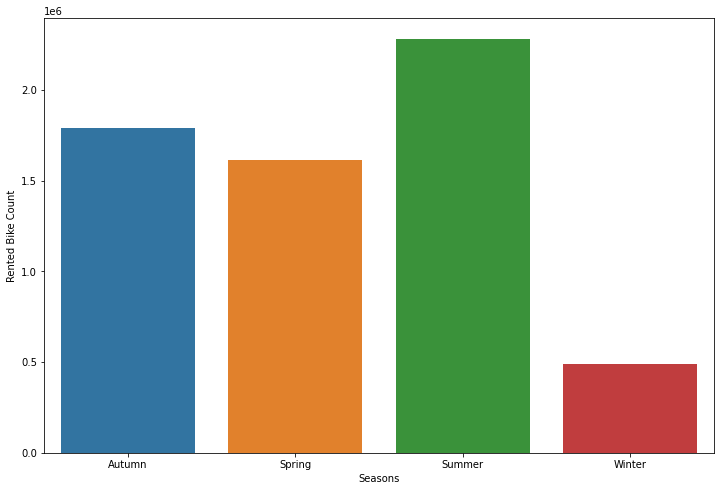

In [630]:
# Seasonal Wise Bike Sharing Demand

seasonal_affect = pd.DataFrame(df.groupby('Seasons',as_index = False)['Rented Bike Count'].sum())

print (seasonal_affect)

plt.figure(figsize = (12,8))
sns.barplot(x='Seasons', y='Rented Bike Count', data = seasonal_affect)

#### 4. Month vs Rented Bike Count

<AxesSubplot:xlabel='month', ylabel='Rented Bike Count'>

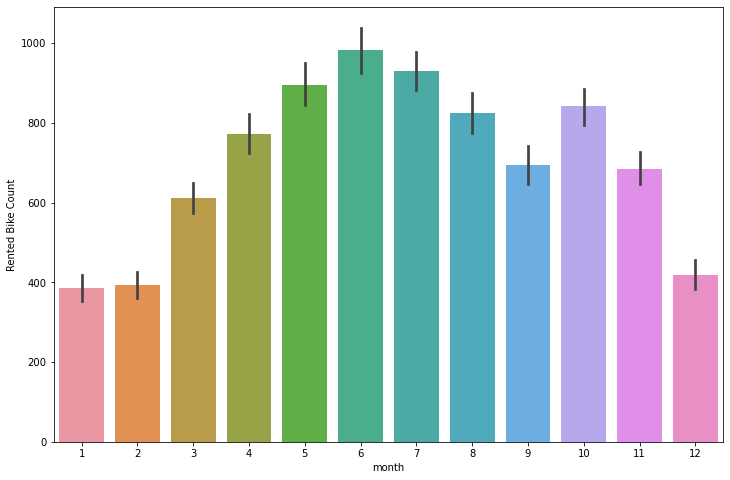

In [632]:
#Create the figure object

plt.figure(figsize = (12,8))
sns.barplot(x='month', y='Rented Bike Count', data = df)

At Evening 6pm , demand goes Maximum. Morning between 7am to 8 am and in evening between 5pm to 7pm are high demand time slots

Well, Seasons do make impact in Bike demand. Summer season has the maximum share of demand , while Winter has lowest. 

## 4) Affect Of Weekday and Weekend !

In [633]:
weekend_affect = df.groupby('weekend', as_index = False)['Rented Bike Count'].sum()

<AxesSubplot:xlabel='weekend', ylabel='Rented Bike Count'>

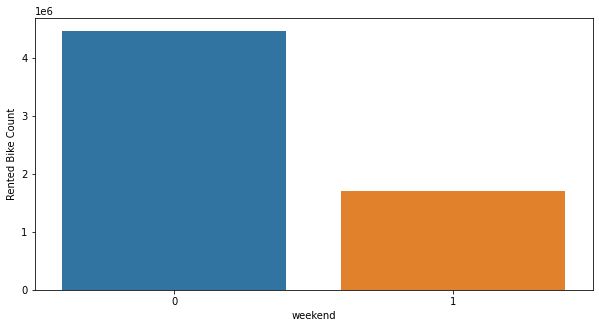

In [634]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'weekend' , y='Rented Bike Count', data= weekend_affect)

Bike sharing demand is more than double on Weekdays compared to Weekends.

### Calculating Variance_Inflation_factor to check multicollinearity

In [635]:
# Creating function for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Calculating VIF
calc_vif(num_df)

,variables,VIF
0,Rented Bike Count,4.079409
1,Hour,4.666421
2,Temperature(�C),4.461586
3,Humidity(%),5.064468
4,Wind speed (m/s),4.615473
5,Visibility (10m),4.842512
6,Solar Radiation (MJ/m2),2.255230
7,Rainfall(mm),1.103319
8,Snowfall (cm),1.120752


 VIF less than 5 confirms no huge multicollinearity

#### Handling Catagorical Variables - Performing One Hot Encoding

In [636]:
# Performing onehot encoder
df = pd.get_dummies(df, columns = ['Hour','month','day','Seasons', 'Holiday'])
df.head()

,Rented Bike Count,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekend,Hour_0,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1


#### Splitting Data for Train and Test

In [637]:
# Create the data of independent variables

dependent_variable = "Rented Bike Count"
X = df[independent_variables].values

# Create the dependent variable data

independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
y = df[dependent_variable].values

KeyError: "['Humidity', 'Snowfall', 'Solar Radiation', 'Visibility', 'Windspeed', 'Rainfall'] not in index"

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

#### Rescaling Data

In [ ]:
# Rescaling data by MinMaxScaler()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Fitting

###  1. Linear Regression

In [638]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor



In [639]:
from sklearn.metrics import accuracy_score, mean_squared_error

#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f'R2 score for Linear Regression Model is : {lr.score(X_train,y_train)}' )
print(f'RMSE for Linear Regression Model is : {round(np.sqrt(mean_squared_error(y_test,y_pred)),3)}')

R2 score for Linear Regression Model is : 0.6195963245444545
RMSE for Linear Regression Model is : 397.447


### 2. Elastic Net

In [640]:
# Elastic Net
en = ElasticNetCV()
en.fit(X_train,y_train)
y_pred_en = en.predict(X_test)
print(f'R2 score for ElasticNet Model is : {en.score(X_train,y_train)}')
print(f'RMSE for ElasticNet Model is : {round(np.sqrt(mean_squared_error(y_test,y_pred_en)),3)}')

R2 score for ElasticNet Model is : 0.4059916907090103
RMSE for ElasticNet Model is : 498.682


### 3. Gradient Bossting

In [641]:
# Gradient Boosting Regressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(f'R2 score for Gradient Boosting Model is :{ gb.score(X_train,y_train)}')
print(f'RMSE for Gradient Boosting Model is : {round(np.sqrt(mean_squared_error(y_test,y_pred_gb)),3)}')

R2 score for Gradient Boosting Model is :0.7782456676441986
RMSE for Gradient Boosting Model is : 316.121


#### 4. Random Forest

In [642]:
#Random Forest

from sklearn.metrics import accuracy_score, mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f'R2 score for Random Forest Model is : {rf.score(X_train,y_train)}')
print(f'RMSE for Random Forestg Model is : {round(np.sqrt(mean_squared_error(y_test,y_pred_rf)),3)}')

R2 score for Random Forest Model is : 0.9736169511657312
RMSE for Random Forestg Model is : 272.797


In [643]:
# Fitting Multiple Linear Regression to the Training set

hb =  HuberRegressor()
hb.fit(X_train,y_train)
y_pred_hb = hb.predict(X_test)
print(f'R2 score for HuberRegressor Model is : {hb.score(X_train,y_train)}')
print(f'RMSE for HuberRegressor Model is : {round(np.sqrt(mean_squared_error(y_test,y_pred_hb)),3)}')

R2 score for HuberRegressor Model is : 0.613796017373965
RMSE for HuberRegressor Model is : 400.23


C:\Users\rankiz\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Model Validation

In [644]:
model_validation = {'Model': ['Linear Regressor', 'Elastic Net', 'Gradient Booster', 'Random Forest','HuberRegressor'], 'R2 Score': [lr.score(X_train,y_train),en.score(X_train,y_train), gb.score(X_train,y_train), rf.score(X_train,y_train),hb.score(X_train,y_train)], 'RMSE':[round(np.sqrt(mean_squared_error(y_test,y_pred)),3),round(np.sqrt(mean_squared_error(y_test,y_pred_en)),3),round(np.sqrt(mean_squared_error(y_test,y_pred_gb)),3),round(np.sqrt(mean_squared_error(y_test,y_pred_rf)),3),round(np.sqrt(mean_squared_error(y_test,y_pred_hb)),3)]}
model_validate = pd.DataFrame(model_validation)
model_validate

,Model,R2 Score,RMSE
0,Linear Regressor,0.619596,397.447
1,Elastic Net,0.405992,498.682
2,Gradient Booster,0.778246,316.121
3,Random Forest,0.973617,272.797
4,HuberRegressor,0.613796,400.230
